In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Modul5_P1"

In [ ]:
%cd /content/drive/My Drive/Modul5_P1

/content/drive/My Drive/Modul5_P1


In [ ]:
!ls

kaggle.json  uncount


Split Dataset

In [ ]:
!mkdir skincancer1

In [ ]:
!mkdir skincancer1/dataset

In [ ]:
base_dir = "/content/drive/My Drive/Modul5_P1/skincancer1/dataset"
data_dir = "/content/drive/My Drive/Modul5_P1/uncount"

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(data_dir, output=base_dir, seed=1337, ratio=(.7, .15, .15))

Copying files: 3316 files [24:25,  2.26 files/s]


In [ ]:
!ls skincancer1/dataset

test  train  val


In [ ]:
import os
import shutil

testbenign = "/content/drive/My Drive/Modul5_P1/skincancer1/dataset/test/benign"
testmalignant = "/content/drive/My Drive/Modul5_P1/skincancer1/dataset/test/malignant"
trainbenign = "/content/drive/My Drive/Modul5_P1/skincancer1/dataset/train/benign"
trainmalignant = "/content/drive/My Drive/Modul5_P1/skincancer1/dataset/train/malignant"
valbenign = "/content/drive/My Drive/Modul5_P1/skincancer1/dataset/val/benign"
valmalignant = "/content/drive/My Drive/Modul5_P1/skincancer1/dataset/val/malignant"

test_b = os.listdir(testbenign)
test_m = os.listdir(testmalignant)
train_b = os.listdir(trainbenign)
train_m = os.listdir(trainmalignant)
val_b = os.listdir(valbenign)
val_m = os.listdir(valmalignant)

print ("Jumlah Train Benign :"+ str(len(train_b)))
print ("Jumlah Train Benign :"+ str(len(train_m)))
print ("Jumlah Test Benign :"+ str(len(test_b)))
print ("Jumlah Test Malignant :"+ str(len(test_m)))
print ("Jumlah Validation Benign :"+ str(len(val_b)))
print ("Jumlah Validation Malignant :"+ str(len(val_m)))

Jumlah Train Benign :1267
Jumlah Train Benign :1054
Jumlah Test Benign :272
Jumlah Test Malignant :227
Jumlah Validation Benign :271
Jumlah Validation Malignant :225


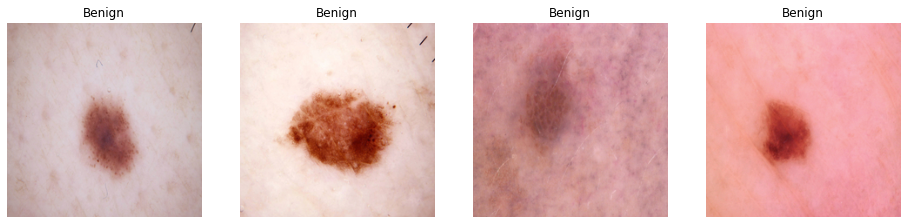

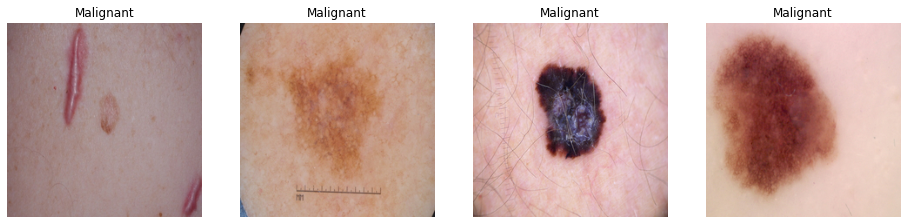

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

trainbenign_dir = os.path.join('/content/drive/My Drive/Modul5_P1/skincancer1/dataset/train/benign')
trainmalignant_dir = os.path.join('/content/drive/My Drive/Modul5_P1/skincancer1/dataset/train/malignant') 

benign_image = os.listdir(trainbenign_dir)
malignant_image = os.listdir(trainmalignant_dir)

fname1 = [os.path.join(trainbenign_dir,fname)
        for fname in benign_image[:4]]

fname2 = [os.path.join(trainmalignant_dir,fname)
        for fname in malignant_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Benign')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Malignant')
    plt.imshow(img)
    
plt.show()

In [ ]:
import os 
import cv2
import numpy as np

# gather data train
train_data = []
train_label = []

train_dir = os.path.join('/content/drive/My Drive/Modul5_P1/skincancer1/dataset/train')
for r, d, f in os.walk(train_dir):
  for file in f :
    if ".jpg" in file :
      imagepath = os.path.join(r, file)
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (250,250))
      train_data.append(image)
      label = imagepath.split(os.path.sep)[-2]
      train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

# gather data testing
test_data = []
test_label = []

test_dir = os.path.join('/content/drive/My Drive/Modul5_P1/skincancer1/dataset/test')
for r, d, f in os.walk(test_dir):
  for file in f :
    if ".jpg" in file :
      imagepath = os.path.join(r, file)
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (250,250))
      test_data.append(image)
      label = imagepath.split(os.path.sep)[-2]
      test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)


# gather data val
val_data = []
val_label = []

val_dir = os.path.join('/content/drive/My Drive/Modul5_P1/skincancer1/dataset/val')
for r, d, f in os.walk(val_dir):
  for file in f :
    if ".jpg" in file :
      imagepath = os.path.join(r, file)
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (250,250))
      val_data.append(image)
      label = imagepath.split(os.path.sep)[-2]
      val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)
print("Val Data = ", val_data.shape)
print("Val Label = ", val_label.shape)

Train Data =  (2321, 250, 250, 3)
Train Label =  (2321,)
Test Data =  (499, 250, 250, 3)
Test Label =  (499,)
Val Data =  (496, 250, 250, 3)
Val Label =  (496,)


In [ ]:
print("Data Training sebelum di-normalisasi : ", train_data[0][0][0])
print("Data Test sebelum di-normalisasi : ", test_data[0][0][0])
print("Data Val sebelum di-normalisasi : ", val_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0

print("Data Training sesudah di-normalisasi : ", x_train[0][0][0])
print("Data Test sesudah di-normalisasi : ", x_test[0][0][0])
print("Data Val sesudah di-normalisasi : ", x_val[0][0][0])

Data Training sebelum di-normalisasi :  [143 147 175]
Data Test sebelum di-normalisasi :  [166 140 218]
Data Val sebelum di-normalisasi :  [169 148 233]
Data Training sesudah di-normalisasi :  [0.56078434 0.5764706  0.6862745 ]
Data Test sesudah di-normalisasi :  [0.6509804  0.54901963 0.85490197]
Data Val sesudah di-normalisasi :  [0.6627451 0.5803922 0.9137255]


In [ ]:
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder", train_label[1260:1270])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder", y_train[1260:1270])
print("Hasil Kelas : ", train_label[1260:1270])

Label sebelum di-encoder ['benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'malignant' 'malignant']
Label setelah di-encoder [0 0 0 0 0 0 0 1 1 1]
Hasil Kelas :  ['benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'malignant' 'malignant']


Model with CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GlobalAveragePooling2D, Conv2D, MaxPool2D, Flatten, Dropout

# Feature Extraction Layer
model = Sequential()
model.add(InputLayer(input_shape = [250,250,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.25))
model.add(GlobalAveragePooling2D())
model.add(Flatten())

# Fully Connected Layer

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Summary Scenario

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
sc = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
73/73 [==============================] - 13s 88ms/step - loss: 0.6613 - acc: 0.5731 - val_loss: 0.6344 - val_acc: 0.6834
Epoch 2/10
73/73 [==============================] - 5s 74ms/step - loss: 0.5727 - acc: 0.6951 - val_loss: 0.4941 - val_acc: 0.7435
Epoch 3/10
73/73 [==============================] - 5s 75ms/step - loss: 0.4926 - acc: 0.7545 - val_loss: 0.4726 - val_acc: 0.7495
Epoch 4/10
73/73 [==============================] - 5s 75ms/step - loss: 0.4651 - acc: 0.7570 - val_loss: 0.4467 - val_acc: 0.7655
Epoch 5/10
73/73 [==============================] - 5s 74ms/step - loss: 0.4405 - acc: 0.7869 - val_loss: 0.4351 - val_acc: 0.7756
Epoch 6/10
73/73 [==============================] - 5s 74ms/step - loss: 0.4458 - acc: 0.7768 - val_loss: 0.4295 - val_acc: 0.7816
Epoch 7/10
73/73 [==============================] - 5s 75ms/step - loss: 0.4342 - acc: 0.7707 - val_loss: 0.4085 - val_acc: 0.7816
Epoch 8/10
73/73 [==============================] - 5s 74ms/step - loss: 0.4154 - 

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.96      0.63      0.76       272
           1       0.68      0.96      0.80       227

    accuracy                           0.78       499
   macro avg       0.82      0.80      0.78       499
weighted avg       0.83      0.78      0.78       499



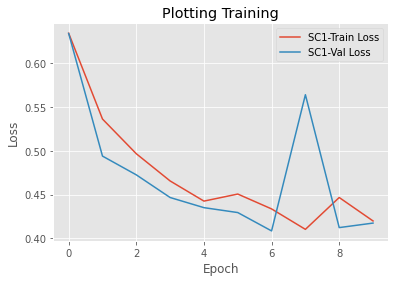

In [ ]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,10), sc.history["loss"], label="SC1-Train Loss")
plt.plot(np.arange(0,10), sc.history["val_loss"], label="SC1-Val Loss")
plt.title("Plotting Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()